In [1]:
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from exact_solution import solve_master_equation, one_excited_emitter_state
from qmarina import run_qmarina_on_simulator

In [2]:
N = 3
g = 4
kappa = 2
times = np.linspace(0, 3, 101)

In [3]:
initial_state = one_excited_emitter_state(N, 1)
qutip_results = solve_master_equation(N, g, kappa, initial_state, times)

In [4]:
qiskit_results = run_qmarina_on_simulator(N, g, kappa, times)

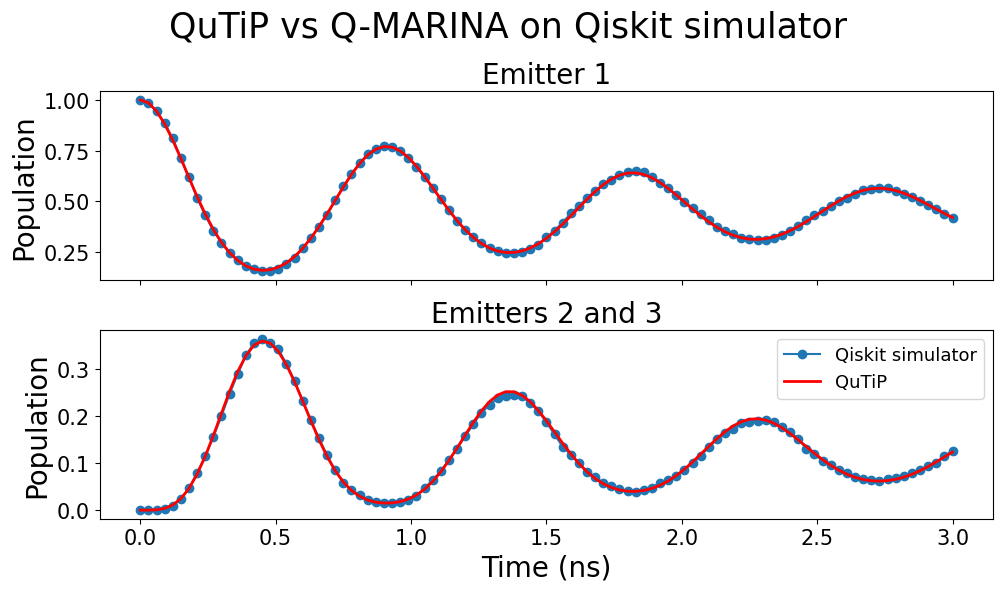

In [7]:
# Plot the RAW (no mitigation) data
fig, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

axes[0].set_title("Emitter 1", fontsize=20)
axes[0].plot(times, qiskit_results["Emitter 1"], marker='o', label="Qiskit simulator")
axes[0].plot(times, qutip_results["Emitter 1"], lw=2, color='red', label="QuTiP")
axes[0].tick_params(axis='y', labelsize=15)
axes[0].set_ylabel("Population", fontsize=20)

axes[1].set_title("Emitters 2 and 3", fontsize=20)
axes[1].plot(times, qiskit_results["Emitter 2"], marker='o', label="Qiskit simulator")
axes[1].plot(times, qutip_results["Emitter 2"], lw=2, color='red', label="QuTiP")
axes[1].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].set_ylabel("Population", fontsize=20)
axes[1].set_xlabel("Time (ns)", fontsize=20)

plt.legend(fontsize=13)

fig.suptitle("QuTiP vs Q-MARINA on Qiskit simulator", fontsize=25)
plt.tight_layout()


In [6]:
fig.savefig("../figures/QMARINA_qiskit_simulation.eps", bbox_inches="tight")